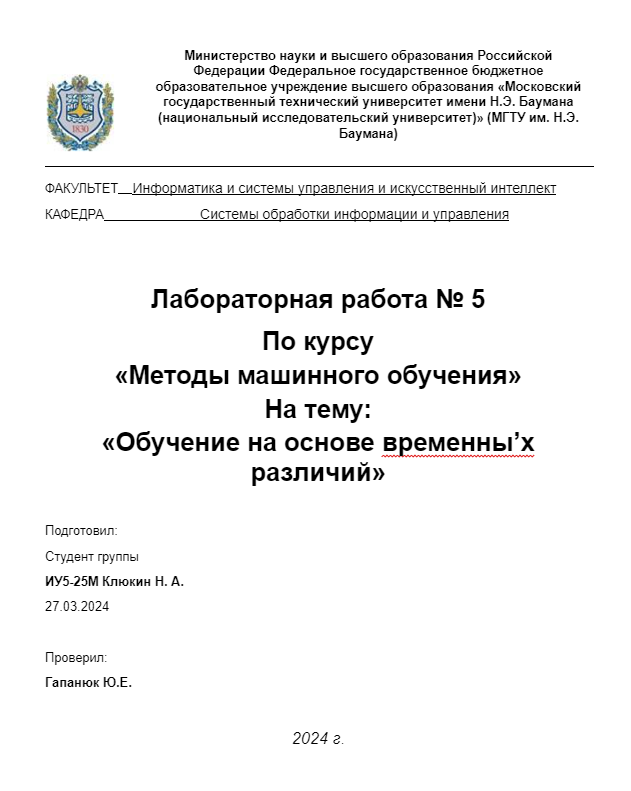

- **Цель лабораторной работы**: ознакомление с базовыми методами обучения с подкреплением на основе временных различий.

# Задание

- На основе рассмотренного на лекции примера реализуйте следующие алгоритмы:
    - SARSA
    - Q-обучение
    - Двойное Q-обучение
- для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки

# Подключение библиотек

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm

In [4]:
class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []


    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)


    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state 


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])


    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:
            
            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)


    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()


    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass

# Ход работы

## SARSA

100%|██████████| 20000/20000 [00:05<00:00, 3352.77it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ -13.26470653  -12.50088708  -14.12708179  -13.2602266 ]
 [ -12.44810083  -11.66480746  -13.22626654  -13.37544225]
 [ -11.6741787   -10.83985372  -12.58114044  -12.6421409 ]
 [ -10.88449284  -10.00515452  -11.74521468  -11.82916784]
 [ -10.07614536   -9.16500291  -11.07197463  -11.06165504]
 [  -9.29169      -8.31889331  -10.29875341  -10.28629389]
 [  -8.42245999   -7.46371483   -9.54298258   -9.41219891]
 [  -7.53198068   -6.59559956   -8.49446658   -8.57624353]
 [  -6.64322634   -5.7141876    -7.57035543   -7.73828363]
 [  -5.79709371   -4.82459413   -5.49548661   -6.84024735]
 [  -4.85539281   -3.92891243   -4.11349098   -5.96644982]
 [  -3.93925862   -3.93892335   -3.00725422   -5.05824473]
 [ -13.29836889  -13.35975581  -14.88402218  -13.98048052]
 [ -12.44108167  -16.57064714  -30.53772836  -17.14037655]
 [ -11.65896373  -16.88879954  -28.44540438  -18.92766783]
 [ -10.87488589  -15.42479893  -22.25254099  -17.57347329]
 [ -10.07842007  -1

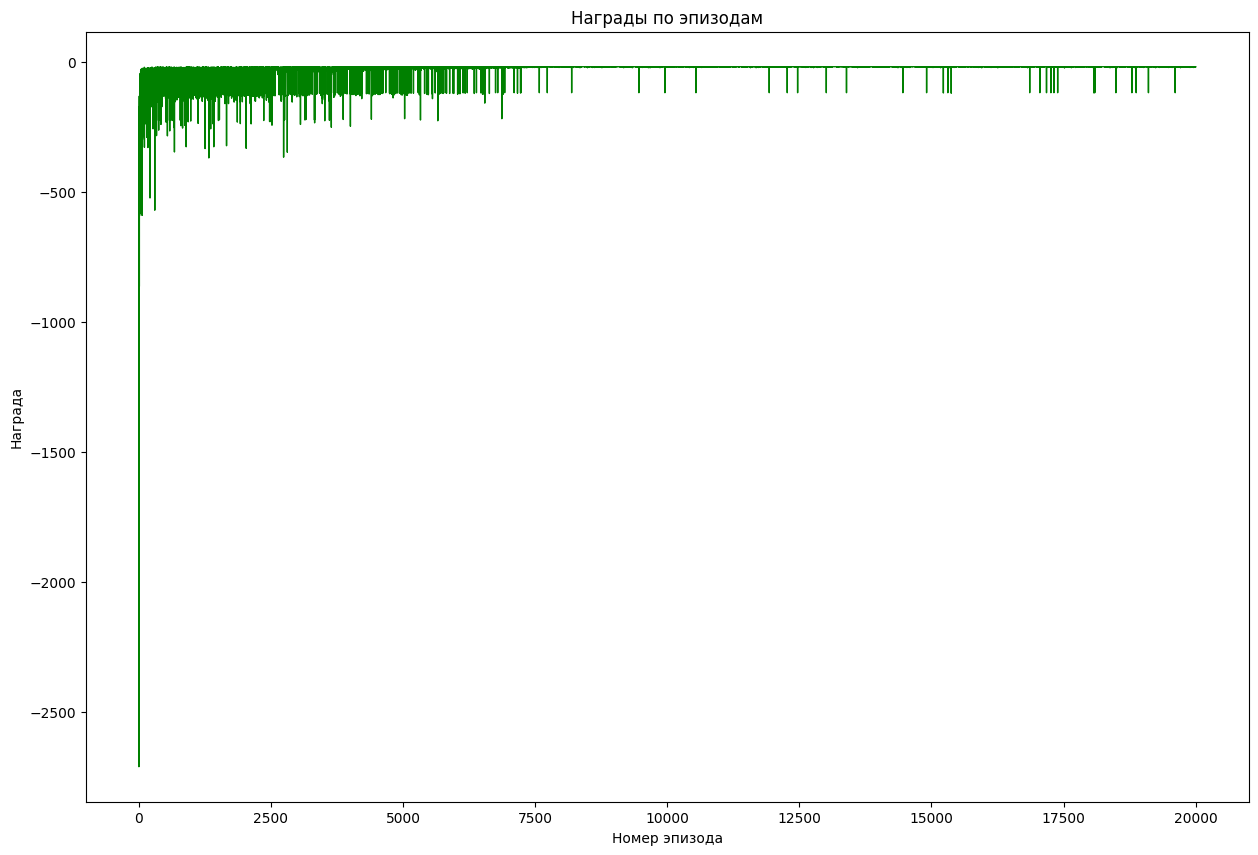

In [6]:
# ************************************ SARSA *****************************************

class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state) 

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие 
                next_action = self.make_action(next_state) 
                
                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)




def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def run_sarsa():
    env = gym.make('CliffWalking-v0')
    agent = SARSA_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


def main():
    run_sarsa()


if __name__ == '__main__':
    main()

## Q-обучение

100%|██████████| 20000/20000 [00:06<00:00, 2974.67it/s]


Вывод Q-матрицы для алгоритма  Q-обучение
[[ -12.6380218   -12.3013737   -12.30091891  -12.46266369]
 [ -12.15963951  -11.54824073  -11.54830237  -12.508789  ]
 [ -11.23082209  -10.76413455  -10.76413705  -11.95132332]
 [ -10.72813239   -9.96342902   -9.96342911  -11.39771031]
 [  -9.90958869   -9.14635926   -9.14635924  -10.67547904]
 [  -9.0718052    -8.31261181   -8.3126118    -9.91521179]
 [  -8.29003744   -7.46184884   -7.46184884   -9.0861385 ]
 [  -7.45246347   -6.59372333   -6.59372333   -8.30107967]
 [  -6.58077485   -5.70788096   -5.70788096   -7.45038973]
 [  -5.69866972   -4.80396016   -4.80396016   -6.56206694]
 [  -4.78195251   -3.881592     -3.881592     -5.6975148 ]
 [  -3.86749983   -3.86932428   -2.9404       -4.78368401]
 [ -13.03262668  -11.54888054  -11.54888054  -12.31780693]
 [ -12.31644188  -10.76416381  -10.76416381  -12.3178932 ]
 [ -11.54879626   -9.96343246   -9.96343246  -11.54887927]
 [ -10.76415213   -9.14635966   -9.14635966  -10.7641638 ]
 [  -9.9634310

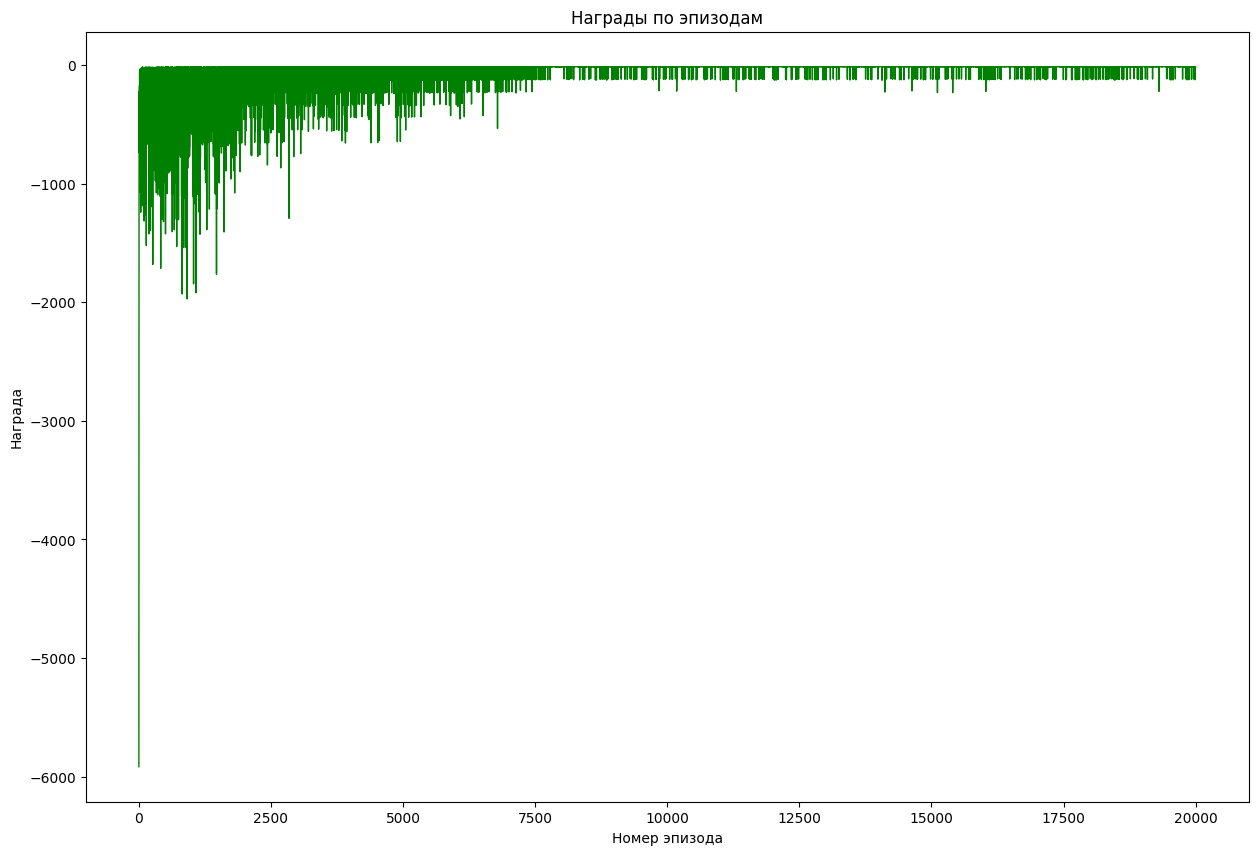

In [5]:
# ************************************ Q-обучение *****************************************
class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде 
                action = self.make_action(state) 
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                #     (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)



def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def run_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)



def main():
    run_q_learning()


if __name__ == '__main__':
    main()

## Двойное Q-обучение

  0%|          | 0/20000 [00:00<?, ?it/s]c:\Users\NKliukin\Code\bmstu\mmo_2_2024\venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|██████████| 20000/20000 [00:07<00:00, 2670.36it/s]


Вывод Q-матриц для алгоритма  Двойное Q-обучение
Q1
[[ -15.36493702  -12.46666513  -14.85526681  -15.25505368]
 [ -13.82732067  -11.55036323  -13.97898739  -14.62249367]
 [ -11.72163427  -10.76416381  -12.53295404  -12.66857913]
 [ -10.76416381   -9.96343246  -11.54888054  -11.54888054]
 [  -9.96343246   -9.14635966  -10.76416381  -10.76416381]
 [  -9.14635966   -8.31261189   -9.96343246   -9.96343246]
 [  -8.31261189   -7.46184887   -9.47385463   -9.14635966]
 [  -7.46184887   -6.59372334   -6.59844374   -8.31261189]
 [  -6.59372334   -5.70788096   -5.70788102   -7.46184887]
 [  -5.70788096   -4.80396016   -4.80781695   -6.59372334]
 [  -4.80396016   -3.881592     -3.881592     -5.70788096]
 [  -3.881592     -3.881592     -2.9404       -4.80396016]
 [ -13.76098274  -13.07154487  -14.85429231  -13.96948718]
 [ -12.44530401  -12.31790293  -13.89840133  -13.87063031]
 [ -11.55895978  -11.54888054  -13.07674458  -13.07361402]
 [ -10.76416381  -10.76416381  -12.31790293  -12.31790293]
 [  

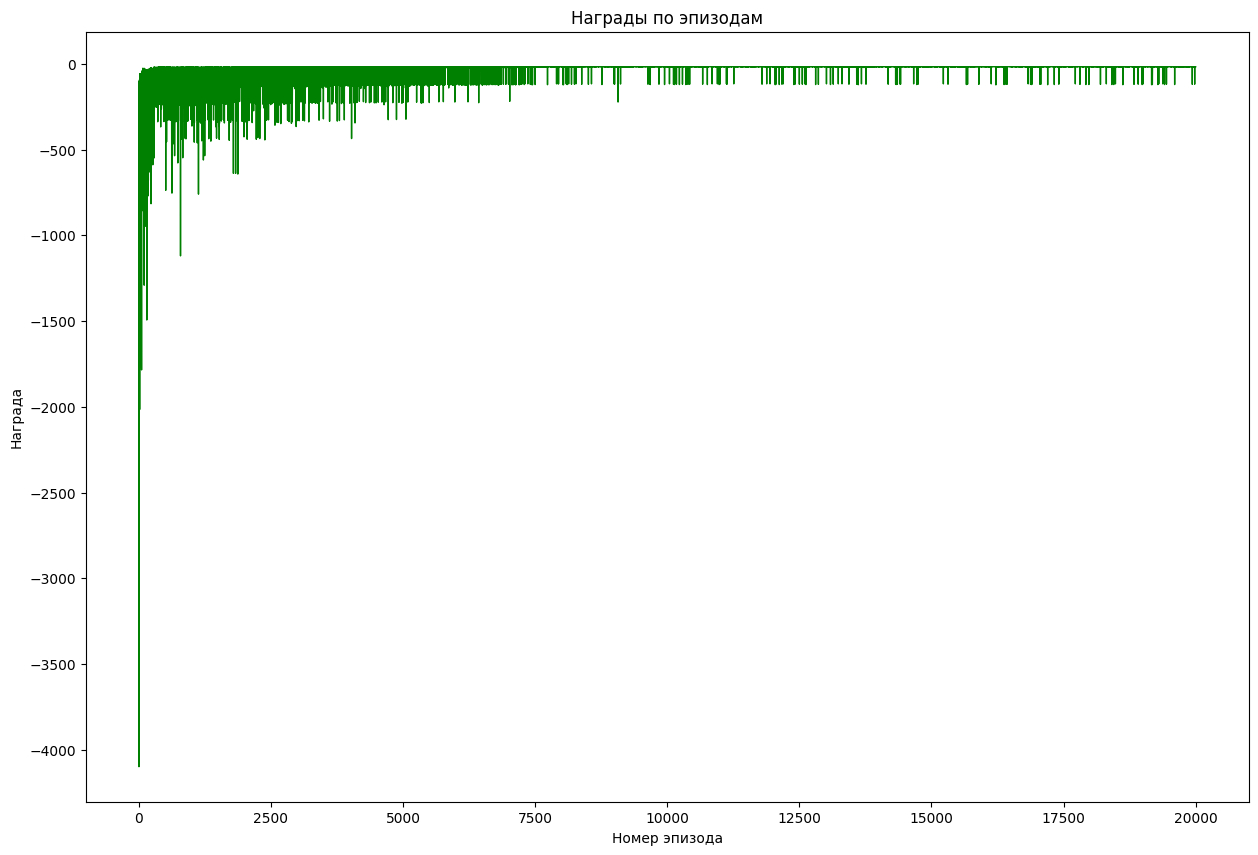

In [5]:
class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'


    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)


    def print_q(self):
        print('Вывод Q-матриц для алгоритма ', self.ALGO_NAME)
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)


    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):

                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде 
                action = self.make_action(state) 
                
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                        (rew + self.gamma * self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                        (rew + self.gamma * self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)




def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def run_double_q_learning():
    env = gym.make('CliffWalking-v0')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)



def main():
    run_double_q_learning()


if __name__ == '__main__':
    run_double_q_learning()